<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day4/Exercises_XP_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal,geom_bar, facet_wrap
import plotly.express as px
import matplotlib.pyplot as plt
import yfinance as yf

data = pd.read_csv('/content/combined_final_last_10_years.csv')
print("Dataset info:")
print(data.info())
print("\nFirst rows of the dataset:")
print(data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          1234 non-null   object 
 1   country            1234 non-null   object 
 2   year               1234 non-null   int64  
 3   demox_eiu          1234 non-null   float64
 4   income_per_person  1234 non-null   int64  
 5   invest_%_gdp       1234 non-null   float64
 6   tax_%_gdp          1234 non-null   float64
 7   gini_index         1234 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 77.2+ KB
None

First rows of the dataset:
  continent           country  year  demox_eiu  income_per_person  \
0    Africa  Congo, Dem. Rep.  2006       27.6                605   
1    Africa  Congo, Dem. Rep.  2007       25.2                623   
2    Africa  Congo, Dem. Rep.  2008       22.8                640   
3    Africa  Congo, Dem. Rep

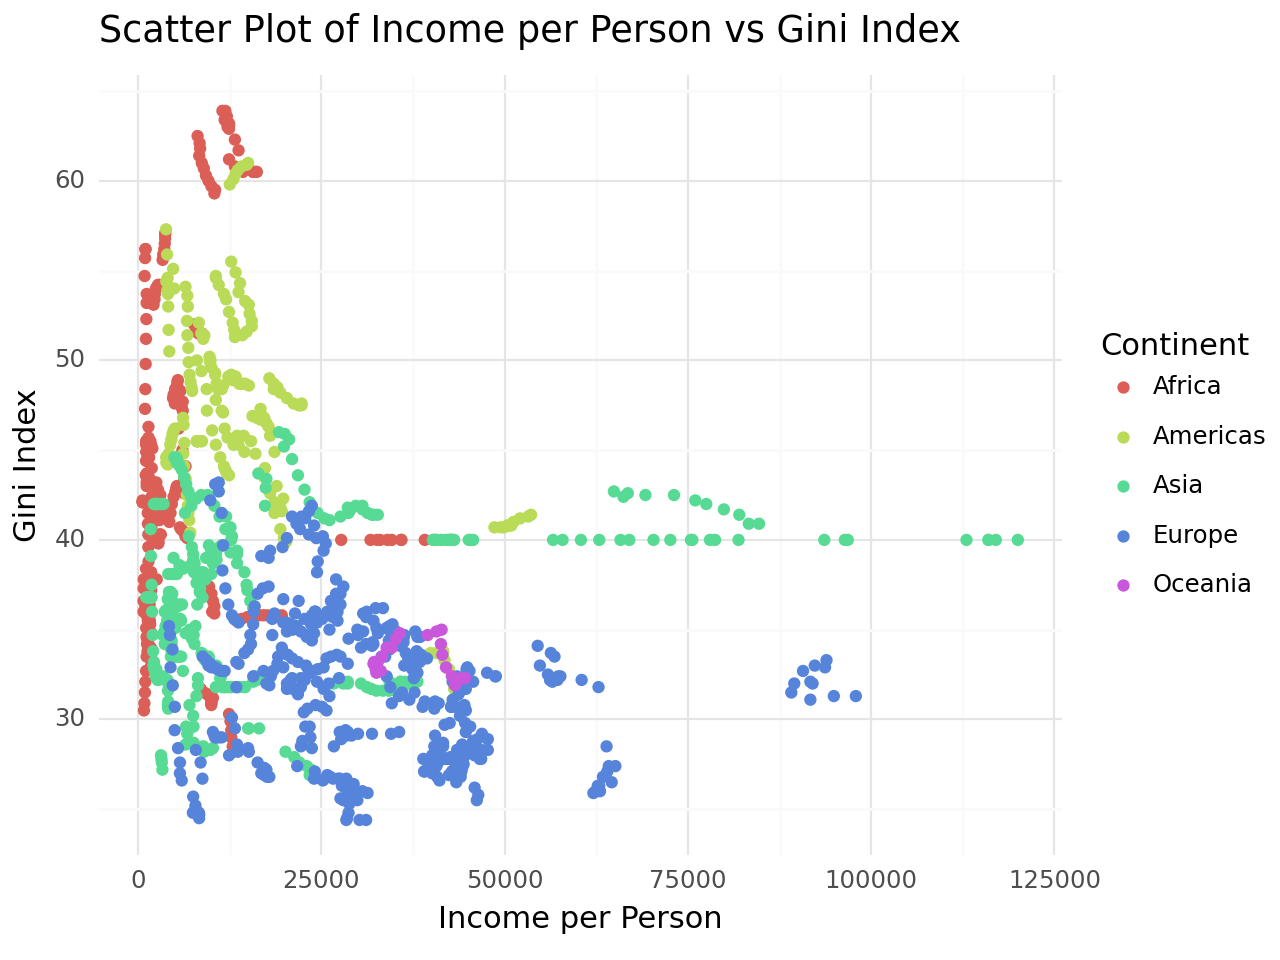

In [6]:
plot = (
    ggplot(data, aes(x='income_per_person', y='gini_index', color='continent')) +
    geom_point() +
    labs(
        title='Scatter Plot of Income per Person vs Gini Index',
        x='Income per Person',
        y='Gini Index',
        color='Continent'
    ) +
    theme_minimal()
)
print(plot)

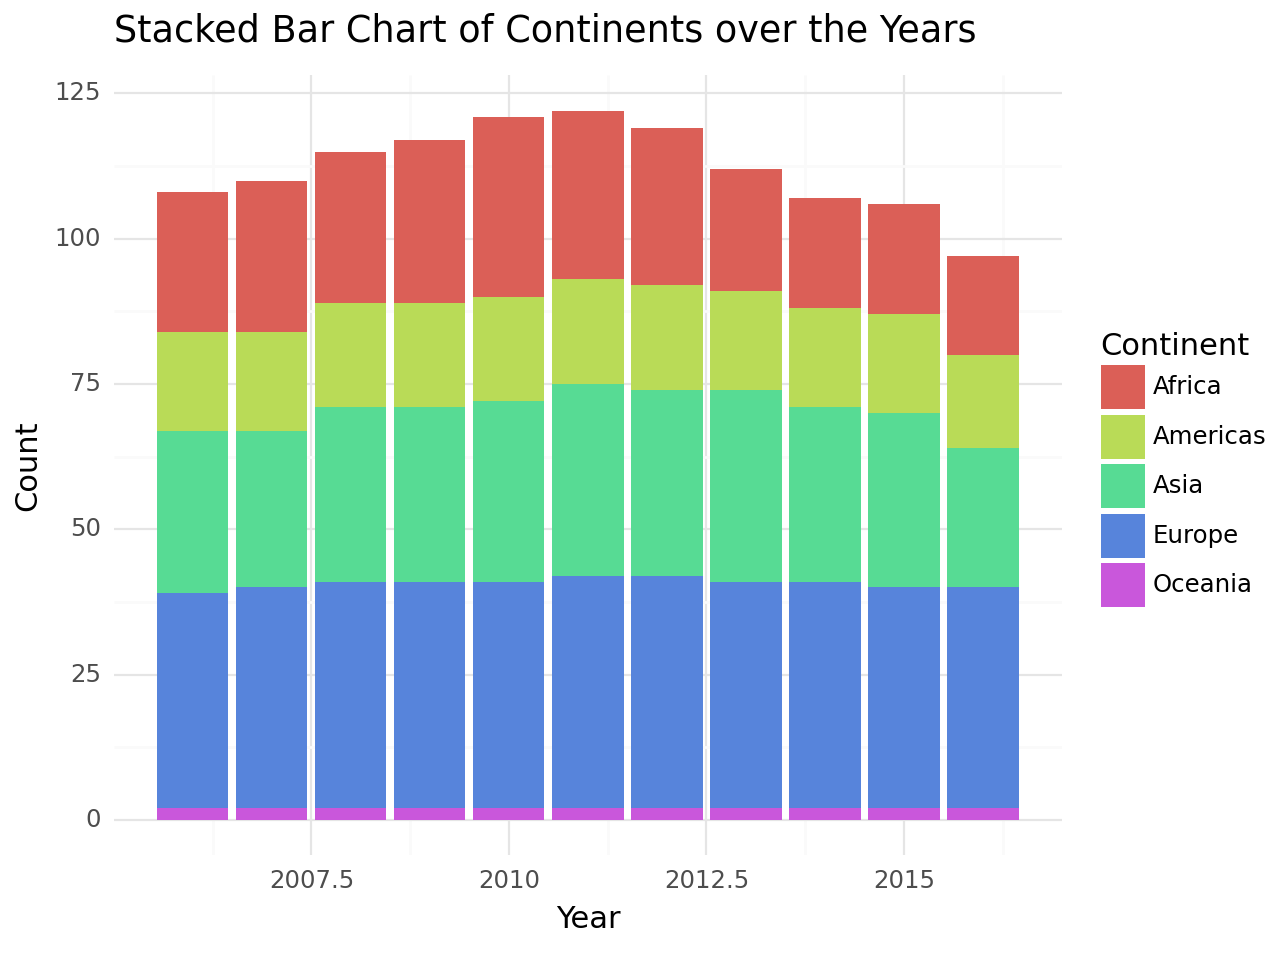

In [7]:
plot = (
    ggplot(data, aes(x='year', fill='continent'))
    + geom_bar(position='stack')
    + labs(title='Stacked Bar Chart of Continents over the Years',
           x='Year',
           y='Count',
           fill='Continent')
    + theme_minimal()
)

print(plot)


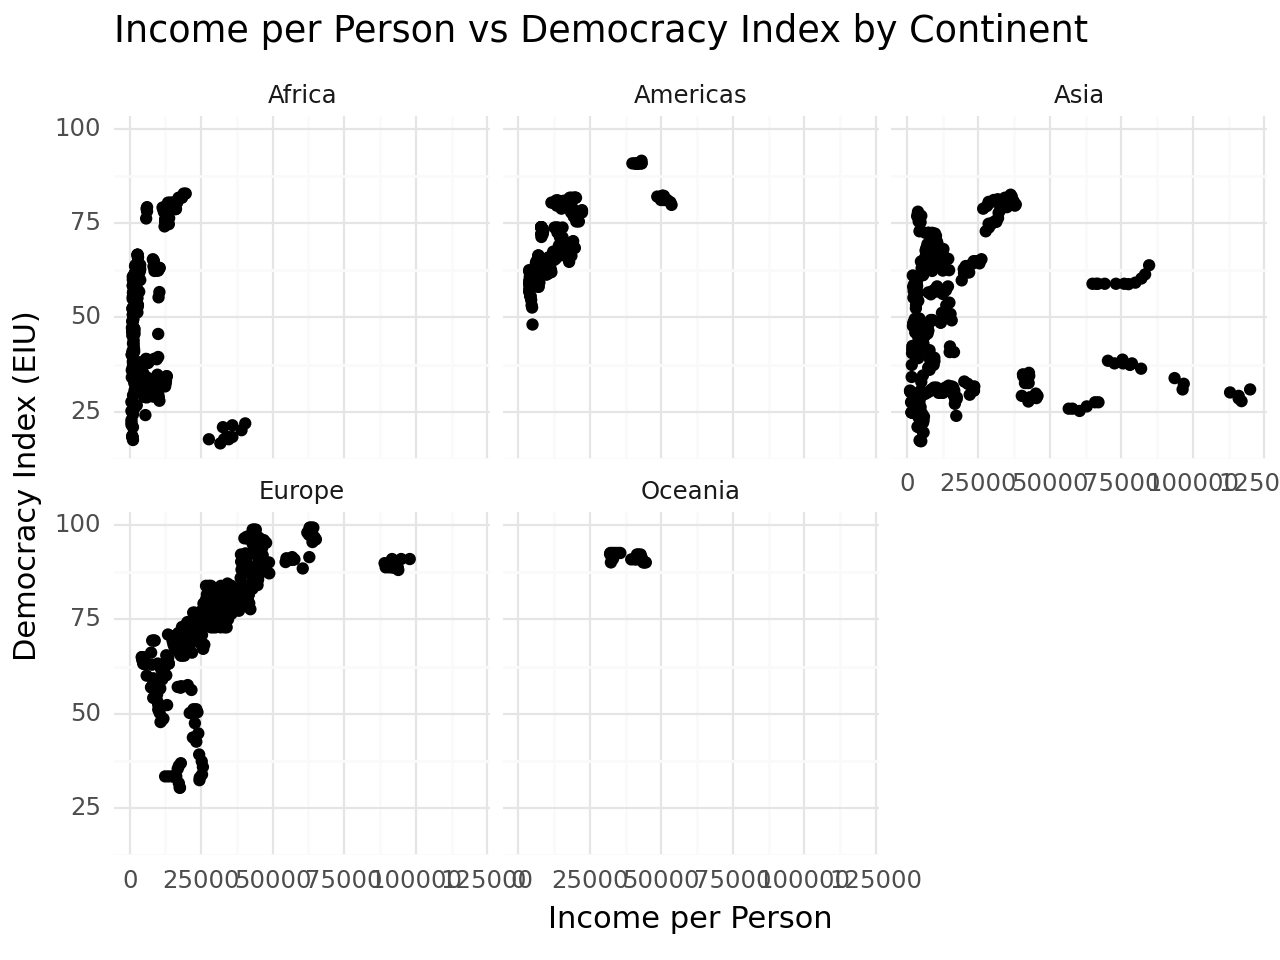

In [10]:
plot = (
    ggplot(data, aes(x='income_per_person', y='demox_eiu'))
    + geom_point()
    + facet_wrap('~continent')
    + labs(title='Income per Person vs Democracy Index by Continent',
           x='Income per Person',
           y='Democracy Index (EIU)')
    + theme_minimal()
)
print(plot)


In [13]:
country_data = data[data['country'] == 'Congo, Dem. Rep.']
fig = px.line(country_data, x='year', y='income_per_person', title='Income per Person over Time in Congo, Dem. Rep.')
fig.show()

In [17]:
fig = px.scatter_3d(data, x='income_per_person', y='invest_%_gdp', z='tax_%_gdp',
                    color='continent', hover_name='country', title='3D Scatter Plot of Economic Indicators')
fig.show()


In [20]:
import plotly.graph_objects as go

df = pd.read_csv('/content/Airlines.csv')
print("Dataset info:")
print(df.info())
print("\nFirst rows of the dataset:")
print(df.head())

heatmap_data = df.pivot_table(index='AirportFrom', columns='AirportTo', values='Delay', aggfunc='mean')

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',
))

fig.update_layout(title='Average Flight Delays by Departure and Arrival Airports',
                  xaxis_title='Arrival Airport',
                  yaxis_title='Departure Airport')

fig.show()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB
None

First rows of the dataset:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466     

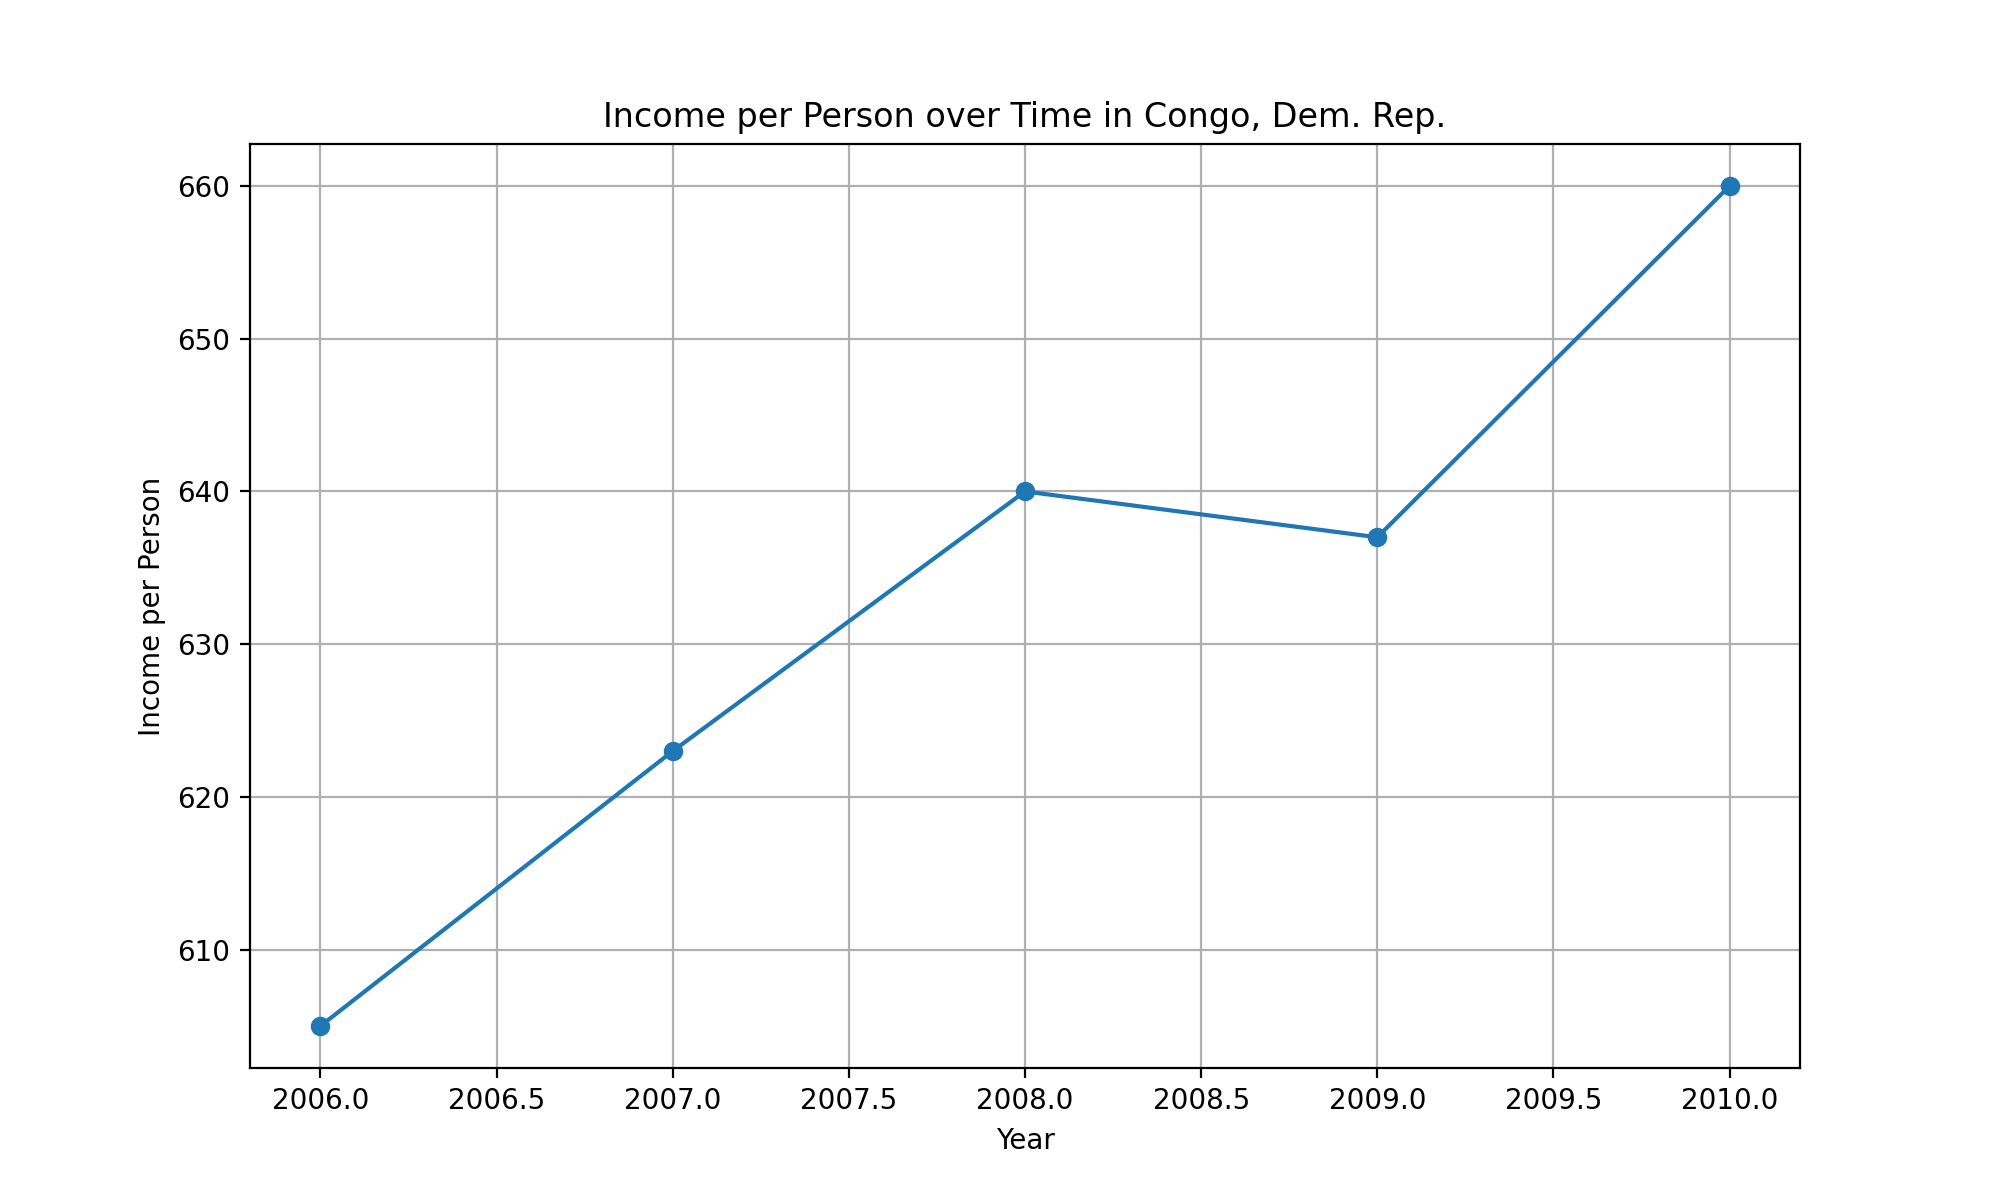

In [23]:
country_data = data[data['country'] == 'Congo, Dem. Rep.']

plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['income_per_person'], marker='o')
plt.title('Income per Person over Time in Congo, Dem. Rep.')
plt.xlabel('Year')
plt.ylabel('Income per Person')
plt.grid(True)

plt.show()


In [25]:
fig = px.scatter(data, x='income_per_person', y='tax_%_gdp', color='continent',
                 hover_data=['country', 'year', 'gini_index'], title='Income per Person vs Tax % of GDP')

fig.show()
